## Exercises

Continue working in your `hypothesis_testing` notebook.

1. Use the `telco_churn` data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
1. Use the `employees` database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?
1. Use the `sleepstudy` data. Is there a relationship between days and reaction time?

In [9]:
# imports

In [10]:
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# load up our data set

In [18]:
df = pd.read_csv('Cust_churn_Telco.csv')

In [19]:
# peak at the dataframe head

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# mess it up on purpose:

In [22]:
r, p = stats.pearsonr(df['tenure'], df['TotalCharges'])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [23]:
# Fix datatype of TotalCharges

In [24]:
df['TotalCharges'] = (df['TotalCharges'] + '0').astype(float)

In [25]:
df[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [14]:
# df = df[df['TotalCharges'] != 0]

In [26]:
# let's calculate correlation between tenure and monthly charges and tenure:total charges

In [27]:
ys = [df.MonthlyCharges, df.TotalCharges]
for y in ys:
    x = df['tenure']
    r, p = stats.pearsonr(x, y)
    print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
    if p < 0.05:
          print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.2478998562861525 with a p value of 4.094044991483017e-99
 p is less than our alpha and we can reject the null hypothesis
Pearson Correlation is calculated at 0.38963197449414855 with a p value of 4.382201025222442e-254
 p is less than our alpha and we can reject the null hypothesis


In [ ]:
# separate phone and internet service into new x and y's for 

In [28]:
# visualize it the first time around: 

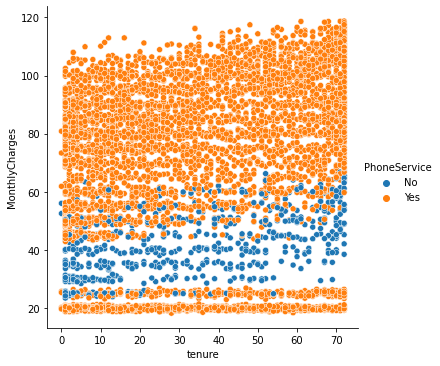

In [29]:
sns.relplot(x='tenure', y='MonthlyCharges', hue='PhoneService', data=df)

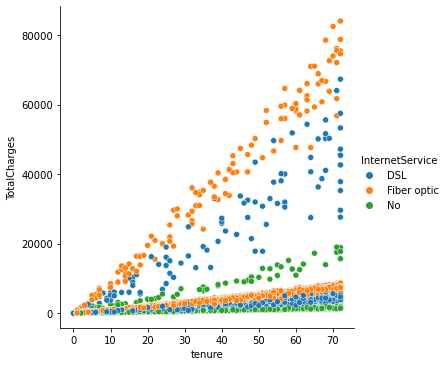

In [30]:
sns.relplot(x='tenure', y='TotalCharges', hue='InternetService', data=df)

In [ ]:
# do it a little manually the first time:

In [31]:
x_phone_tenure = df['tenure'][df['PhoneService'] == 'Yes']
x_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'Yes']
y_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'Yes']

In [32]:
x_no_phone_tenure = df['tenure'][df['PhoneService'] == 'No']
x_no_phone_totalcharges = df['TotalCharges'][df['PhoneService'] == 'No']
y_no_phone_monthlycharges = df['MonthlyCharges'][df['PhoneService'] == 'No']

In [33]:
r, p = stats.pearsonr(x_phone_tenure, y_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.2453889858536324 with a p value of 7.117871077925186e-88
 p is less than our alpha and we can reject the null hypothesis


In [34]:
r, p = stats.pearsonr(x_no_phone_tenure, y_no_phone_monthlycharges)
print(f'Pearson Correlation is calculated at {r} with a p value of {p}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

Pearson Correlation is calculated at 0.5857597986661375 with a p value of 4.6033703473404816e-64
 p is less than our alpha and we can reject the null hypothesis


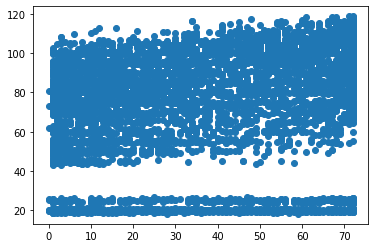

In [35]:
plt.scatter(x_phone_tenure, y_phone_monthlycharges)

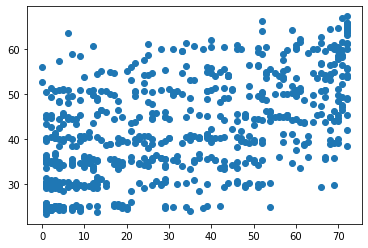

In [36]:
plt.scatter(x_no_phone_tenure, y_no_phone_monthlycharges)

In [37]:
# make the columns more explicit for our dictionary keys and labels

In [38]:
df['InternetService'] = 'Internet Service : ' + df['InternetService']
df['PhoneService'] = 'Phone Service : ' + df['PhoneService']
df['Internet_and_Phone'] = df['InternetService'] + ' ' +df['PhoneService']

In [39]:
# peek at the value counts for combined values:

In [40]:
df['Internet_and_Phone'].value_counts()

Internet Service : Fiber optic Phone Service : Yes    3096
Internet Service : DSL Phone Service : Yes            1739
Internet Service : No Phone Service : Yes             1526
Internet Service : DSL Phone Service : No              682
Name: Internet_and_Phone, dtype: int64

In [41]:
# lets use dictionary structures and loops to make our life a little easier

In [42]:
x = {}
y = {}
control = ['InternetService', 'PhoneService', 'Internet_and_Phone']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['tenure'] = df['tenure'][df[cntrl] == val]
        y[val]['TotalCharges'] = df['TotalCharges'][df[cntrl] == val]
        y[val]['MonthlyCharges'] = df['MonthlyCharges'][df[cntrl] == val]

In [43]:
# now let's use those dictionaries to calculate our pearson's r and visualize our x and y

 For customers with Internet Service : DSL:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.430 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


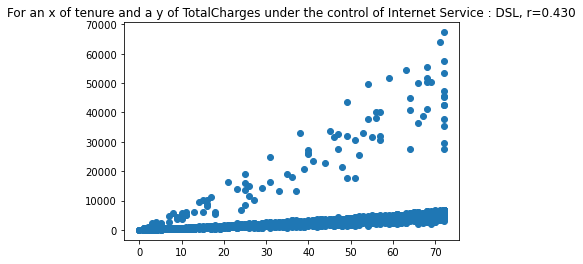

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.517 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


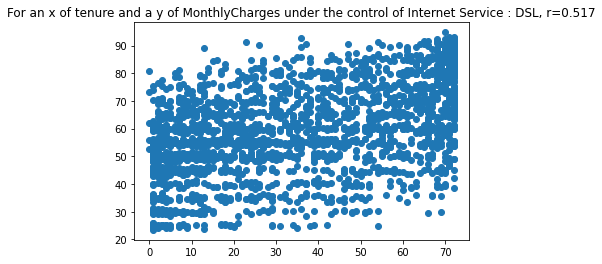

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : Fiber optic:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.420 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


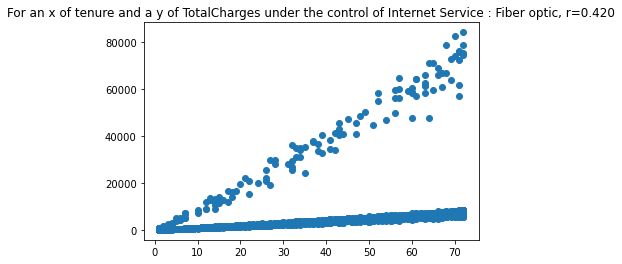

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.625 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


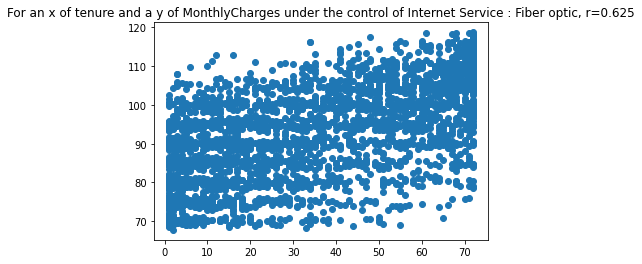

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : No:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.416 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


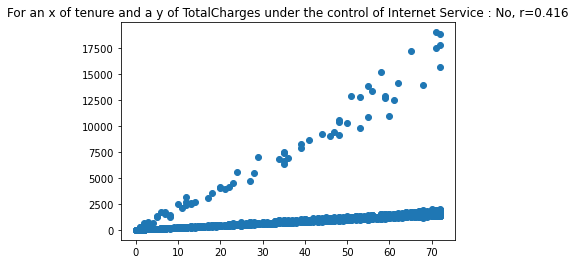

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.342 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


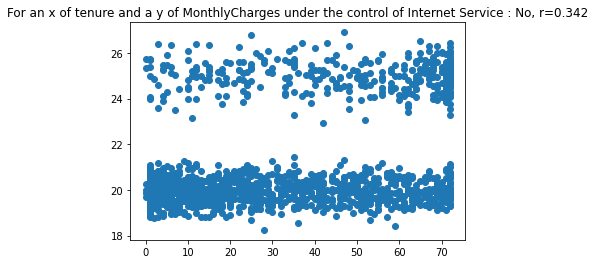

----------------------------------
----------------------------------
----------------------------------
 For customers with Phone Service : No:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.423 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


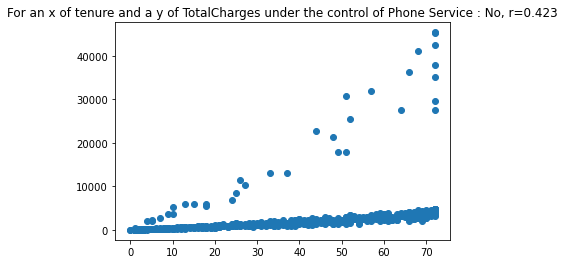

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.586 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


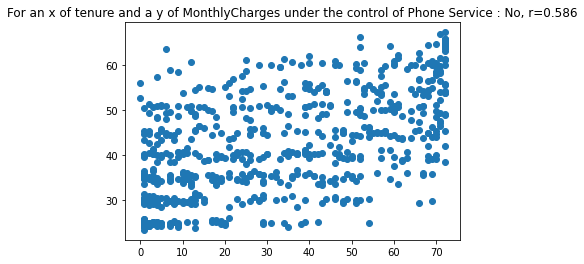

----------------------------------
----------------------------------
----------------------------------
 For customers with Phone Service : Yes:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.388 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


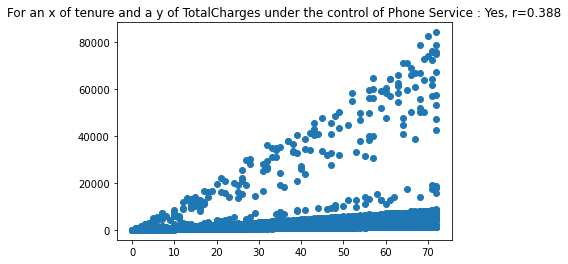

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.245 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


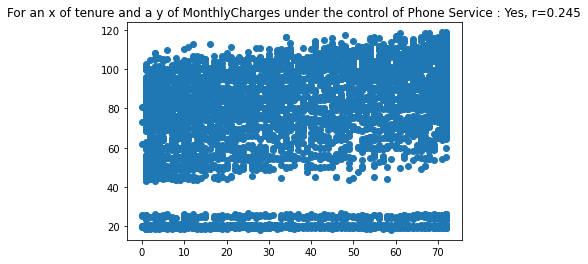

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : DSL Phone Service : No:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.423 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


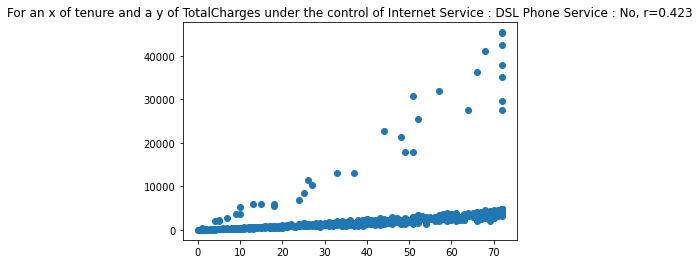

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.586 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


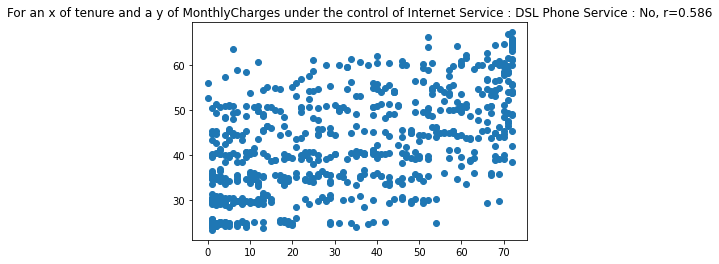

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : DSL Phone Service : Yes:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.433 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


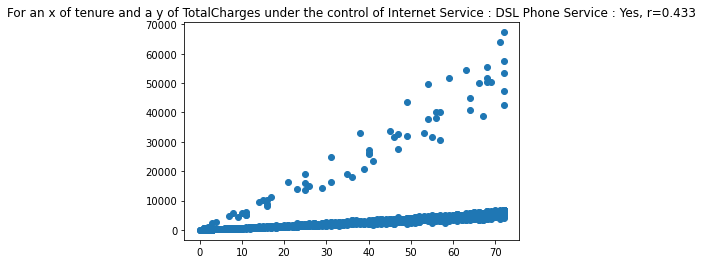

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.655 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


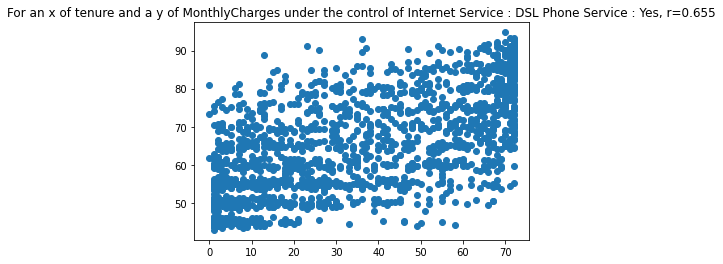

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : Fiber optic Phone Service : Yes:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.420 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


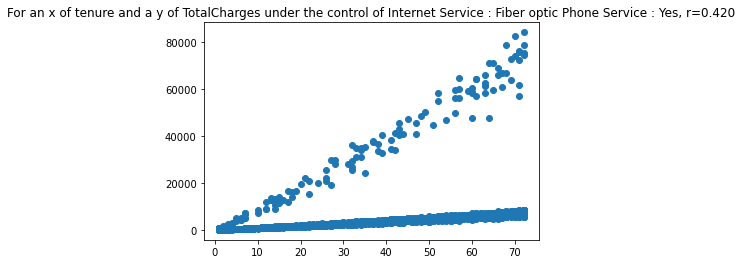

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.625 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


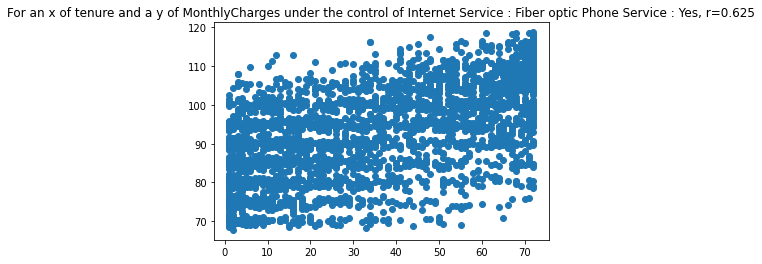

----------------------------------
----------------------------------
----------------------------------
 For customers with Internet Service : No Phone Service : Yes:
For an x of tenure and a y of TotalCharges: 
Pearson Correlation is calculated at 0.416 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


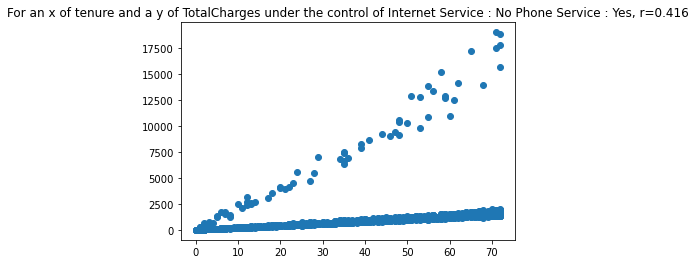

----------------------------------
----------------------------------
----------------------------------
For an x of tenure and a y of MonthlyCharges: 
Pearson Correlation is calculated at 0.342 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


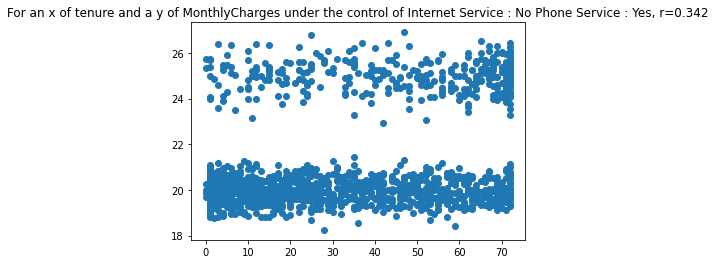

----------------------------------
----------------------------------
----------------------------------


<Figure size 432x288 with 0 Axes>

In [44]:
for key in y:
    print(f' For customers with {key}:')
    for subkey in y[key]:
        print(f'For an x of tenure and a y of {subkey}: ')
        r, p = stats.pearsonr(x[key]['tenure'], y[key][subkey])
        print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
        if p < 0.05:
              print(f' p is less than our alpha and we can reject the null hypothesis')
        plt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
        plt.scatter(x[key]['tenure'], y[key][subkey])
        plt.show()
        plt.clf()
        print('----------------------------------')
        print('----------------------------------')
        print('----------------------------------')

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

2. Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?


<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

In [45]:
# get our environment set up

In [2]:
from env import usr,pw,host
from sqlalchemy import create_engine
def get_connection(db, user, host, password):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [3]:
# set up db

In [4]:
db = 'employee'

In [5]:
# set up queries

In [6]:
qr = '''SELECT e.*, s.salary, t.title FROM employees AS e 
JOIN titles AS t ON e.emp_no = t.emp_no
JOIN salaries as s ON t.emp_no = s.emp_no;'''

In [50]:
query = 'SELECT * FROM employees'
query2 = 'SELECT * FROM salaries'
query3 = 'SELECT * FROM titles'

In [7]:
# get connection

In [8]:
conn = get_connection('employees', usr, host, pw)

In [53]:
# get employees, salaries, titles

In [ ]:
df 

In [54]:
employees = pd.read_sql(query, conn)
salaries = pd.read_sql(query2, conn)
titles = pd.read_sql(query3, conn)

In [55]:
# aggregate titles by employee number

In [56]:
countref = titles.groupby('emp_no').count()[['title']].rename(columns={'title': 'titlecount'})

In [57]:
# join that to titles

In [58]:
merged = pd.merge(titles, countref, how='left', on='emp_no')

In [59]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   title       443308 non-null  object
 2   from_date   443308 non-null  object
 3   to_date     443308 non-null  object
 4   titlecount  443308 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 20.3+ MB


In [60]:
# convert the from and to dates to pandas datetimes so we can subtract them

In [61]:
merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

<ipython-input-61-fa881b3429af>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  merged['to_date'] = merged['to_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))


In [62]:
merged['from_date'] = merged['from_date'].apply(lambda x: pd.datetime.now() if str(x).startswith('9999') else pd.to_datetime(x))

In [63]:
merged['tenure'] = (merged.to_date - merged.from_date).astype(int)

In [64]:
# join it to the original employees dataframe

In [65]:
merged = pd.merge(employees, merged, how='left', on='emp_no')

In [66]:
# and join that to salaries so we have all our data in one place

In [67]:
merged_sal = pd.merge(merged,salaries, how='left', on='emp_no')

In [68]:
# check for nulls in the dataframe

In [69]:
merged_sal[['tenure','salary']].isnull().values.any()

False

In [65]:
# save it so you don't neeed to do all that again
# merged_sal.to_csv('merged_sal.csv')

In [ ]:
# correlation for tenure vs salary?

Pearson Correlation is calculated at 0.028 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


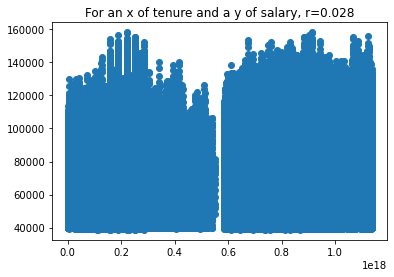

In [66]:
r, p =  stats.pearsonr(merged_sal['tenure'], merged_sal['salary'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
plt.title(f'For an x of tenure and a y of salary, r={r:.3f}')
plt.scatter(merged_sal['tenure'], merged_sal['salary'])

In [ ]:
# correlation for tenure vs number of titles held?

Pearson Correlation is calculated at -0.246 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


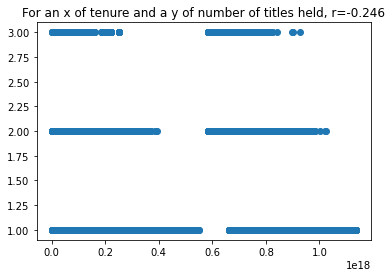

In [67]:
r, p =  stats.pearsonr(m2['tenure'], m2['titlecount'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
plt.title(f'For an x of tenure and a y of number of titles held, r={r:.3f}')
plt.scatter(m2['tenure'], m2['titlecount'])

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

3. Use the `sleepstudy` data. Is there a relationship between days and reaction time?

<hr style="border-top: 10px groove green; margin-top: 1px; margin-bottom: 1px"></hr>

In [ ]:
# get the sleepstudy from the pydataset

In [32]:
from pydataset import data

In [34]:
df = data('sleepstudy')

In [ ]:
# get the doc to remind ourself what's here

In [61]:
# data('sleepstudy', show_doc=True)

In [62]:
# df.info()

In [63]:
# df.head()

In [ ]:
# let's pull a standard correlation

Pearson Correlation is calculated at 0.535 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


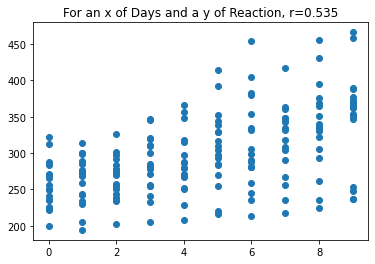

In [38]:
r, p = stats.pearsonr(df['Days'], df['Reaction'])
print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')
plt.title(f'For an x of Days and a y of Reaction, r={r:.3f}')
plt.scatter(df['Days'], df['Reaction'])

In [ ]:
# let's separate it out by subject like we did with telco:

In [41]:
x = {}
y = {}
control = ['Subject']
for cntrl in control:
    for val in df[cntrl].unique():
        x[val] = {}
        y[val] = {}
        x[val]['Days'] = df['Days'][df[cntrl] == val]
        y[val]['Reaction'] = df['Reaction'][df[cntrl] == val]

In [42]:
# now let's use those dictionaries to calculate our pearson's r and visualize our x and y

 For subject 308:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.826 with a p value of 0.003
 p is less than our alpha and we can reject the null hypothesis


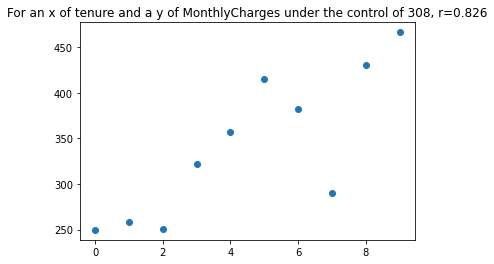

----------------------------------
----------------------------------
----------------------------------
 For subject 309:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.633 with a p value of 0.049
 p is less than our alpha and we can reject the null hypothesis


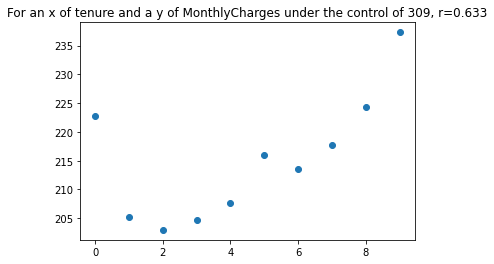

----------------------------------
----------------------------------
----------------------------------
 For subject 310:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.847 with a p value of 0.002
 p is less than our alpha and we can reject the null hypothesis


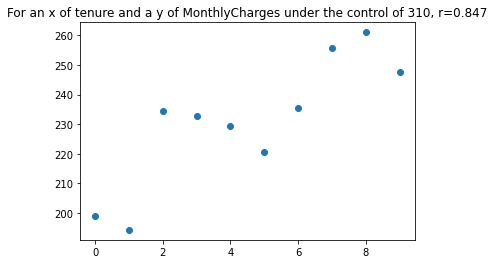

----------------------------------
----------------------------------
----------------------------------
 For subject 330:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.398 with a p value of 0.255


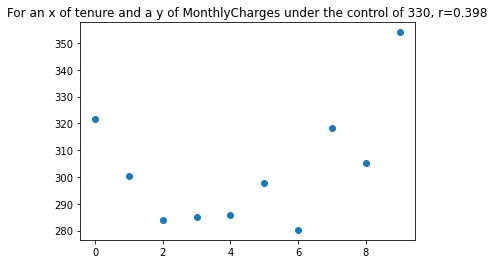

----------------------------------
----------------------------------
----------------------------------
 For subject 331:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.585 with a p value of 0.076


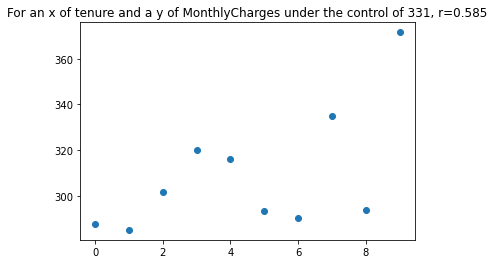

----------------------------------
----------------------------------
----------------------------------
 For subject 332:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.450 with a p value of 0.191


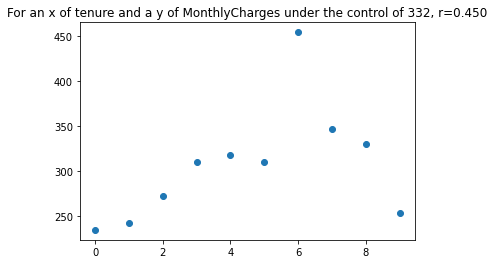

----------------------------------
----------------------------------
----------------------------------
 For subject 333:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.921 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


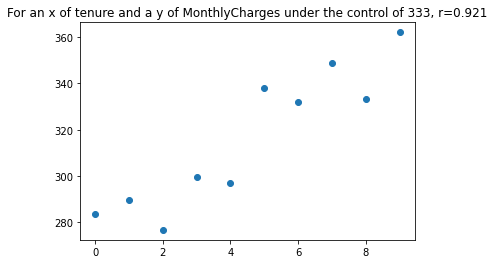

----------------------------------
----------------------------------
----------------------------------
 For subject 334:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.886 with a p value of 0.001
 p is less than our alpha and we can reject the null hypothesis


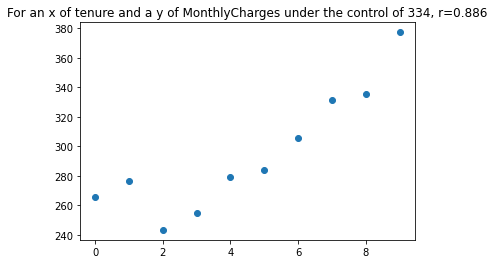

----------------------------------
----------------------------------
----------------------------------
 For subject 335:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at -0.631 with a p value of 0.051


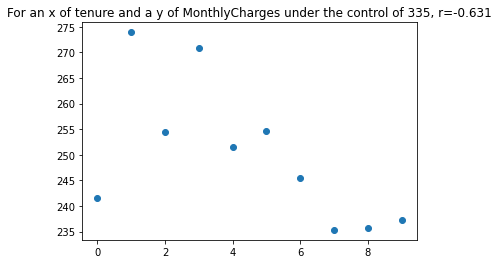

----------------------------------
----------------------------------
----------------------------------
 For subject 337:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.966 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


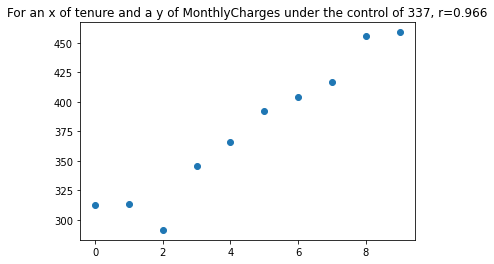

----------------------------------
----------------------------------
----------------------------------
 For subject 349:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.951 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


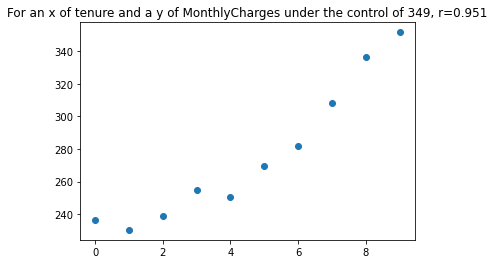

----------------------------------
----------------------------------
----------------------------------
 For subject 350:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.932 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


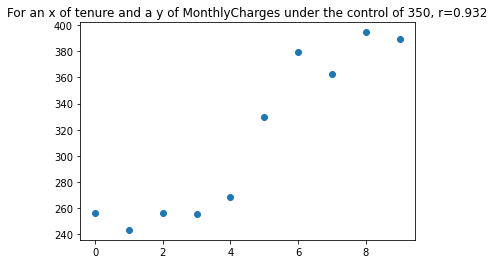

----------------------------------
----------------------------------
----------------------------------
 For subject 351:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.672 with a p value of 0.033
 p is less than our alpha and we can reject the null hypothesis


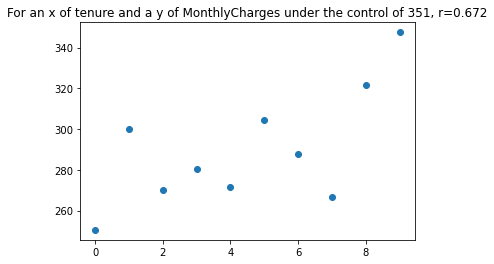

----------------------------------
----------------------------------
----------------------------------
 For subject 352:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.863 with a p value of 0.001
 p is less than our alpha and we can reject the null hypothesis


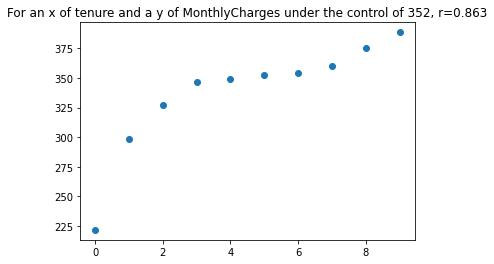

----------------------------------
----------------------------------
----------------------------------
 For subject 369:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.917 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


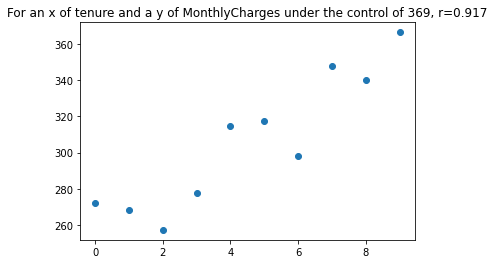

----------------------------------
----------------------------------
----------------------------------
 For subject 370:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.923 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


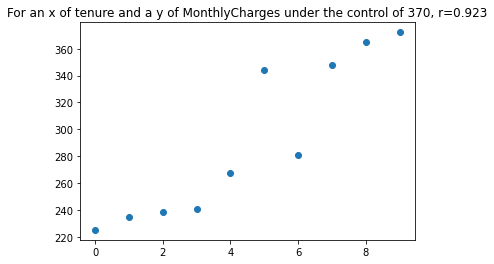

----------------------------------
----------------------------------
----------------------------------
 For subject 371:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.762 with a p value of 0.010
 p is less than our alpha and we can reject the null hypothesis


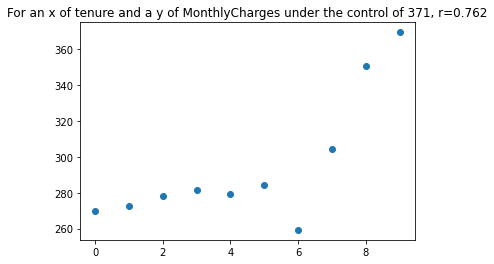

----------------------------------
----------------------------------
----------------------------------
 For subject 372:
For an x of Days and a y of Reaction Time: 
Pearson Correlation is calculated at 0.955 with a p value of 0.000
 p is less than our alpha and we can reject the null hypothesis


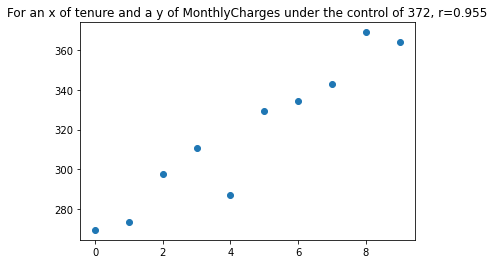

----------------------------------
----------------------------------
----------------------------------


<Figure size 432x288 with 0 Axes>

In [44]:
corr = {}
for key in y:
    print(f' For subject {key}:')
    print(f'For an x of Days and a y of Reaction Time: ')
    r, p = stats.pearsonr(x[key]['Days'], y[key]['Reaction'])
    print(f'Pearson Correlation is calculated at {r:.3f} with a p value of {p:.3f}')
    if p < 0.05:
        print(f' p is less than our alpha and we can reject the null hypothesis')
        corr[key] = r
    plt.title(f'For an x of tenure and a y of {subkey} under the control of {key}, r={r:.3f}')
    plt.scatter(x[key]['Days'], y[key]['Reaction'])
    plt.show()
    plt.clf()
    print('----------------------------------')
    print('----------------------------------')
    print('----------------------------------')

In [45]:
corr.keys()

dict_keys([308, 309, 310, 333, 334, 337, 349, 350, 351, 352, 369, 370, 371, 372])

In [46]:
corr

{308: 0.8255381278369811,
 309: 0.633349342428891,
 310: 0.8470799097781476,
 333: 0.9205376478914586,
 334: 0.8863382869649219,
 337: 0.9661243878155332,
 349: 0.9514873771740564,
 350: 0.931989016488642,
 351: 0.6721594392859361,
 352: 0.8628721310076778,
 369: 0.9171840023764399,
 370: 0.923312993531196,
 371: 0.7620502625234488,
 372: 0.9548838048833137}

In [58]:
max(corr.values())

0.9661243878155332

In [59]:
min(corr.values())

0.633349342428891